<center>

# NLP : Intro to NLP 💬

<img src="https://miro.medium.com/v2/resize:fit:3054/1*iZkt37UpqKojcP2ZQTuEOA.gif" width="50%">

<!-- ![](https://miro.medium.com/v2/resize:fit:3054/1*iZkt37UpqKojcP2ZQTuEOA.gif) -->

---
___

## Use cases

<center>

<img src="https://www.pandasecurity.com/en/mediacenter/src/uploads/2021/07/block-spam-yahoo-02-1.gif" width="50%">

___


<img src="https://i0.wp.com/www.crowd4test.com/blog/wp-content/uploads/2019/12/google-voice-search-header-short.gif?ssl=1" width="50%">

___

<img src="https://blog.hubspot.com/hs-fs/hubfs/top-search-engines_0.webp?width=600&height=364&name=top-search-engines_0.webp" width="50%">

___

<img src="https://i.giphy.com/media/7fNXLdViGSlKo/giphy.webp" width="50%">

___

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/244/original/Screenshot_2023-08-31_at_1.53.40_PM.png?1693470291" width="50%">

___

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/245/original/Screenshot_2023-08-31_at_1.56.44_PM.png?1693470424" width="50%">

___



In [ ]:
!gdown 11LWo5nagSmC72hOJM9lm2l05sdQxt4rf

# 1.  Dataset source: kaggle covid tweets:
    #  https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
# 2.  Total 11,663 tweets with positive and negative labels

Downloading...
From: https://drive.google.com/uc?id=11LWo5nagSmC72hOJM9lm2l05sdQxt4rf
To: /content/corona_tweets.csv
100% 1.00M/1.00M [00:00<00:00, 88.6MB/s]


In [ ]:
import os
import re
import random
import string      # for string operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataframe = pd.read_csv("./corona_tweets.csv")
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# px.pie(dataframe, names='Sentiment',hole=0.3, title='Sentiment Pie Chart', width=540, height=400)

Labels in the dataset:  ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64


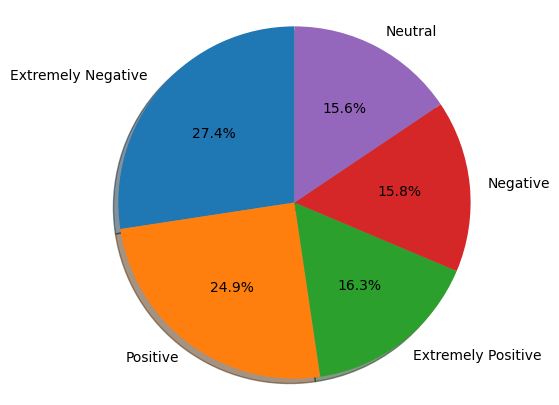

In [ ]:
# Check tweets distribution
def pie_chart(dataframe): # matplotlib
  # Converting pd object to list of string
  label_types  = dataframe.Sentiment.unique().astype(str)
  # Count tweets for each label
  label_counts = dataframe.Sentiment.value_counts()
  print('Labels in the dataset: ', label_types)
  print(label_counts)
  # labels for the two classes
  labels = label_types #'Positives', 'Negative'
  # Sizes for each slide
  sizes = [count for count in label_counts]
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))
  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal')
  # Display the chart
  plt.show()

pie_chart(dataframe)

In [ ]:
# Separating positive_tweets and negative_tweets
all_positive_tweets = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)) # Making equal positive and negative tweet counts
all_negative_tweets = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

# Splitting training and testing set. 80/20 split
positive_train, positive_test = train_test_split(all_positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size=0.2, random_state=42)

print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + all_positive_tweets[random.randint(0,947)])

# print negative in red
print('\033[91m' + '\nnegative in red: ')
print('\033[91m' + all_negative_tweets[random.randint(0,947)])

Size of training dataset:  1514
Size of testing dataset:  380

positive in green: 





#Covid_19 #coronavirus

negative in red: 
More than 4.4 million Canadians say they feel food insecure due to financial constraints: report https://t.co/3GPXCThrNM https://t.co/t507X4oG9k


In [ ]:
# Split on spaces
tweet = all_positive_tweets[12] # Our selected sample. Just for explanation

word = tweet.split() # space tokenizer
print('Using Split :',word)

Using Split : ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus.', 'https://t.co/5mYfz3RAD0', '#retail', '#ecommerce', '#study', '#coronavirus', 'https://t.co/Dz3H6zrWUT']



<details>
<summary>
    <font size="4" color=""><b>Regular Expression</b> [Post read]</font>
</summary>
* A regular expression is a notation to represent standards in strings.

* Series of characters that define an abstract search pattern.

* It serves to search and extract information in texts.

Regex is used in Google analytics in URL matching in supporting search and replaced in most popular editors like Sublime, Notepad++, Google Docs, and Microsoft Word.

```
Example :  Regular expression for an email address :
         ^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$
```
The above regular expression is used for checking if a given set of characters is an email address or not.


<details>
<summary>
    <font size="4" color=""><b>How to write regular expression?</b></font>
</summary>
<p>
<ol>
<li>
    
Repeaters : *, + and { } symbols act as repeaters and tell the computer that the preceding character is to be used for more than just one time.

* The asterisk symbol ( * ): to match the preceding character (or set of characters) for 0 or more times (up to infinite).

* The Plus symbol ( + ): to repeat the preceding character (or set of characters) for at least one or more times(up to infinite).

* The curly braces {…}: to repeat the preceding character (or set of characters) as many times as the value inside this bracket.

</li>

<li>

Character Classes: matches any one of a set of characters. It is used to match the most basic element of a language like a letter, a digit, space, a symbol, etc.

* /s : matches any whitespace characters such as space and tab
* /S : matches any non-whitespace characters
* /d : matches any digit character
* /D : matches any non-digit characters
* /w : matches any word character (basically alpha-numeric)
* /W : matches any non-word character
* /b : matches any word boundary (this would include spaces, dashes, commas, semi-colons, etc)

</li>

<li>
Wildcard – ( . ): The dot symbol can take place of any other symbol.

</li>

<li>
Optional character – ( ? ): tells the computer that the preceding character may or may not be present in the string to be matched.

</li>

<li>
The caret ( ^ ) : tells the computer that the match must start at the beginning of the string or line.

</li>

<li>
The dollar ( $ ) tells the computer that the match must occur at the end of the string or before \n at the end of the line or string.

</li>

</ol>
</p>
</details>

Read More: [Link1](https://buildregex.com/), [Link2](https://regexr.com/), [regex-quickstart](http://www.rexegg.com/regex-quickstart.html), [How to write regular expression?](https://www.geeksforgeeks.org/write-regular-expressions/)




</details>